In [1]:
from Mixture_Models import *

#### Simulating some data

In [2]:
data = make_pinwheel(radial_std=0.3, tangential_std=0.05, num_classes=3,
                         num_per_class=100, rate=0.4,rs=npr.RandomState(0))

#### Initializing the model

In [3]:
test_TMM = TMM(data)

#### Initializing the input parameters

In [4]:
npr.seed(10)
init_params = test_TMM.init_params(num_components=3,scale=0.5)
print(init_params)

{'log proportions': array([ 0.66579325,  0.35763949, -0.77270015]), 'means': array([[-0.00419192,  0.31066799],
       [-0.36004278,  0.13275579],
       [ 0.05427426,  0.00214572]]), 'sqrt_covs': array([[[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]]), 'log_dofs': array([-0.17460021,  0.43302619,  1.20303737])}


#### Fitting the model with the above initialization parameters

In [5]:
## we are using gradient descent with momentum for 100 iterations with mass = 0.9 and learning rate = 5e-4
params_store = test_TMM.fit(init_params,"grad_descent", learning_rate = 0.0005, mass = 0.9, maxiter = 100) 

Log likelihood -842.0967902627169
Log likelihood -841.3846354457795
Log likelihood -840.0340607705809
Log likelihood -838.1135443221565
Log likelihood -835.6865028564893
Log likelihood -832.8115399977291
Log likelihood -829.5427150981131
Log likelihood -825.9298101292961
Log likelihood -822.0185771646139
Log likelihood -817.8509514532229
Log likelihood -813.4652156255681
Log likelihood -808.8960997022003
Log likelihood -804.174799589128
Log likelihood -799.3288937910793
Log likelihood -794.3821342475848
Log likelihood -789.3540825505593
Log likelihood -784.2595573787661
Log likelihood -779.107852819121
Log likelihood -773.9016803438842
Log likelihood -768.6357794958024
Log likelihood -763.2951335168302
Log likelihood -757.8527155662937
Log likelihood -752.2666775002469
Log likelihood -746.4768742829128
Log likelihood -740.4005902768201
Log likelihood -733.9272977400908
Log likelihood -726.9122411835132
Log likelihood -719.168648223686
Log likelihood -710.4585842757072
Log likelihood -7

#### Posthoc analysis

In [6]:
### We define an auxillary function for plotting the clusters
def draw_clusters(unpacked_params,input_data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for log_proportion, mean, cov_sqrt, dofs in zip(*unpacked_params):
        num_points = 100
        alpha = np.minimum(1.0, np.exp(log_proportion) * 10)
        angles = np.linspace(0, 2*np.pi, num_points)
        circle_pts = np.vstack([np.cos(angles), np.sin(angles)]).T * 2.0
        cur_pts = mean + np.dot(circle_pts, cov_sqrt)
        ax.plot(cur_pts[:, 0], cur_pts[:, 1], '-', alpha=alpha)
        ax.plot(input_data[:, 0], input_data[:, 1], 'k.')
    ax.plot(input_data[:, 0], input_data[:, 1], 'k.')

    plt.show()
    

likelihood -842.0967902627169
aic,bic 1724.1935805254338 1798.269230018558


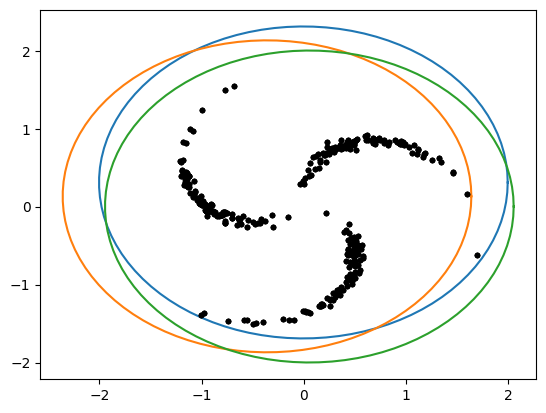

likelihood -841.3846354457795
aic,bic 1722.769270891559 1796.844920384683


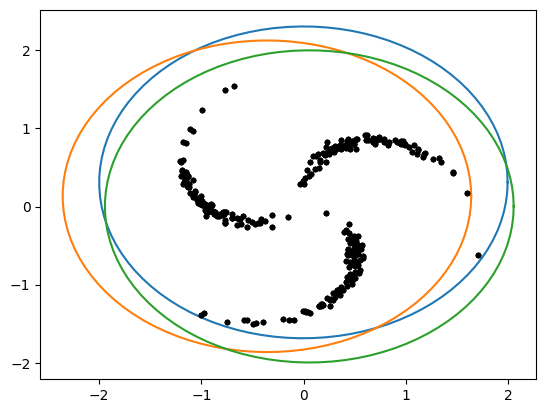

likelihood -840.0340607705809
aic,bic 1720.0681215411619 1794.143771034286


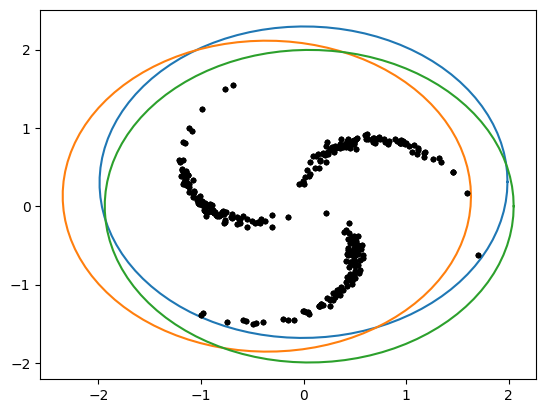

likelihood -838.1135443221565
aic,bic 1716.227088644313 1790.302738137437


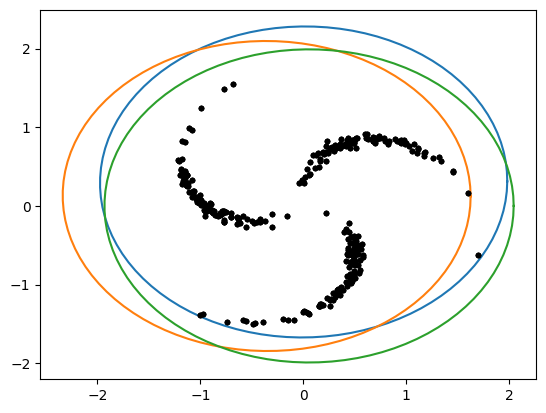

likelihood -835.6865028564893
aic,bic 1711.3730057129785 1785.4486552061026


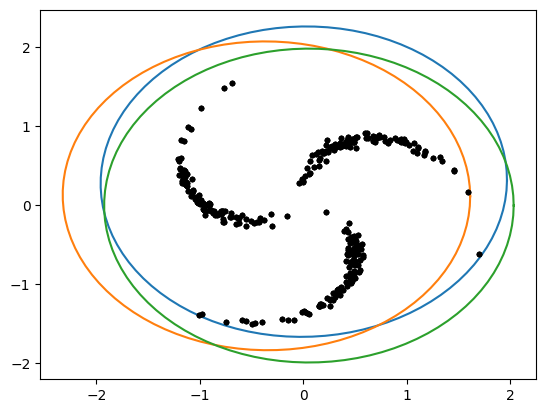

likelihood -832.8115399977291
aic,bic 1705.6230799954583 1779.6987294885823


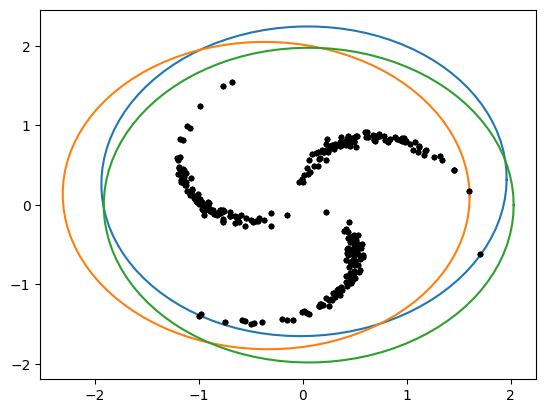

likelihood -829.5427150981131
aic,bic 1699.0854301962263 1773.1610796893503


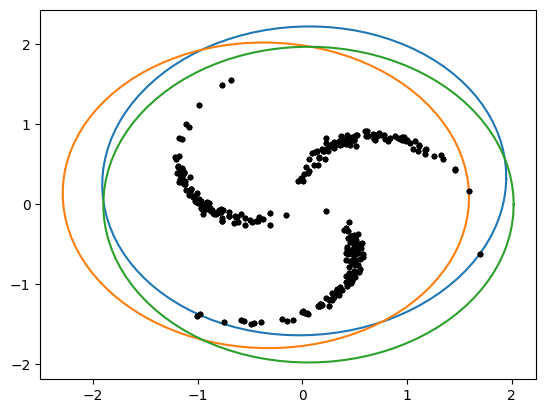

likelihood -825.9298101292961
aic,bic 1691.8596202585923 1765.9352697517163


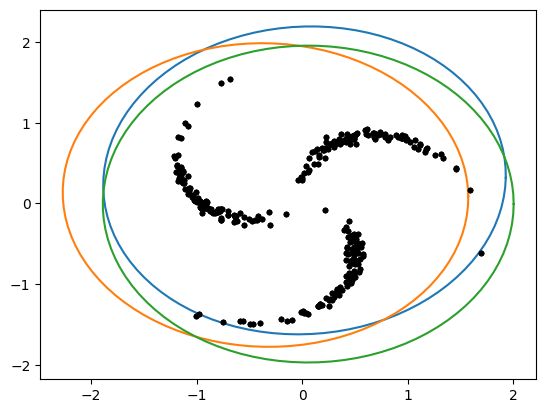

likelihood -822.0185771646139
aic,bic 1684.0371543292279 1758.112803822352


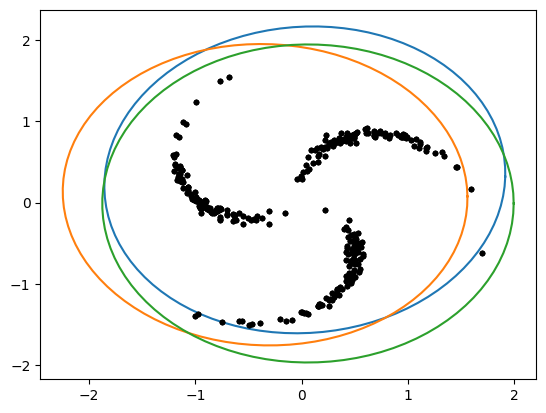

likelihood -817.8509514532229
aic,bic 1675.7019029064459 1749.77755239957


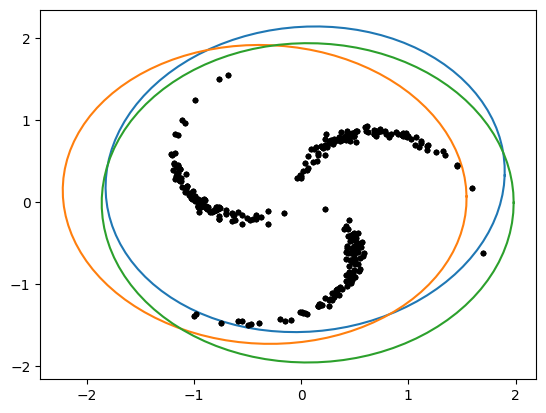

likelihood -813.4652156255681
aic,bic 1666.9304312511363 1741.0060807442603


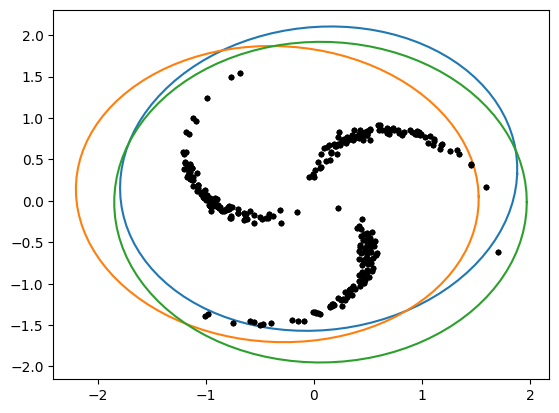

likelihood -808.8960997022003
aic,bic 1657.7921994044007 1731.8678488975247


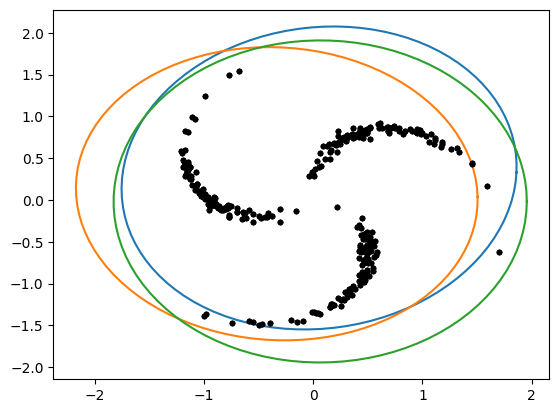

likelihood -804.174799589128
aic,bic 1648.349599178256 1722.4252486713801


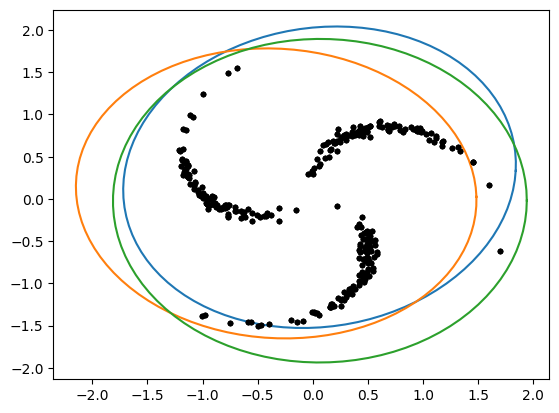

likelihood -799.3288937910793
aic,bic 1638.6577875821586 1712.7334370752826


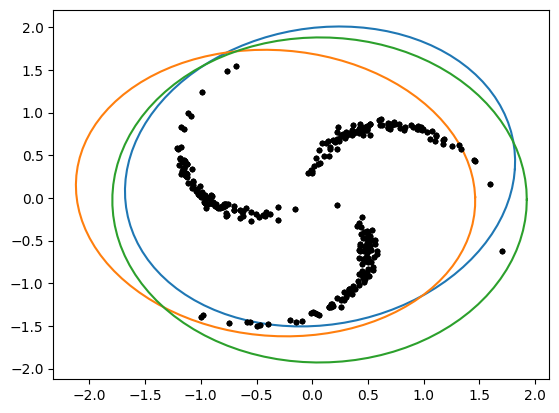

likelihood -794.3821342475848
aic,bic 1628.7642684951695 1702.8399179882936


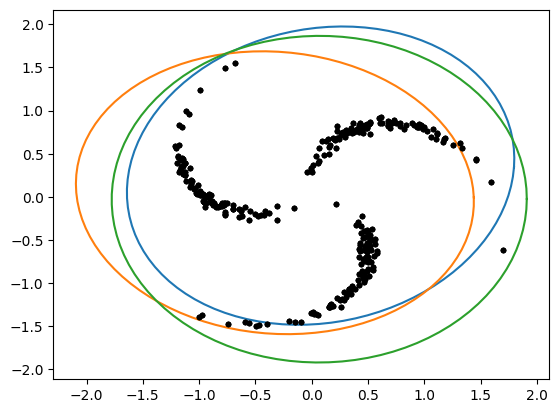

likelihood -789.3540825505593
aic,bic 1618.7081651011185 1692.7838145942426


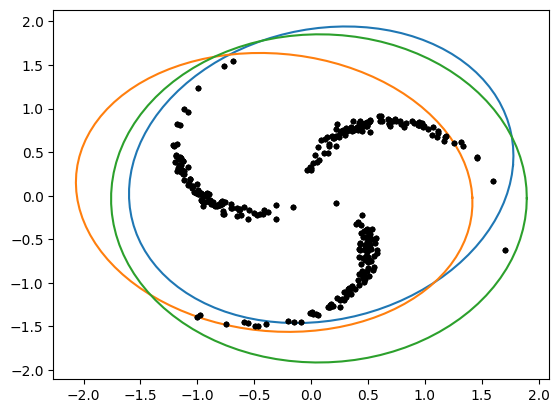

likelihood -784.2595573787661
aic,bic 1608.5191147575322 1682.5947642506562


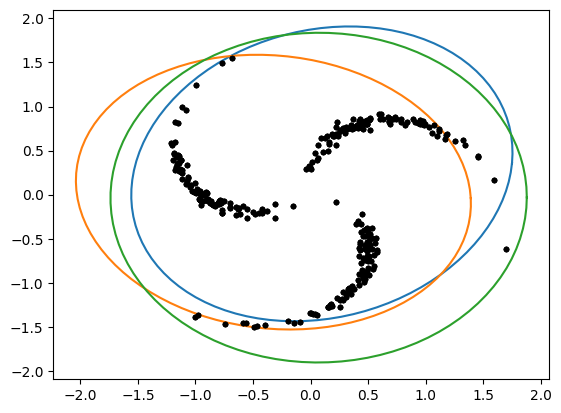

likelihood -779.107852819121
aic,bic 1598.215705638242 1672.2913551313661


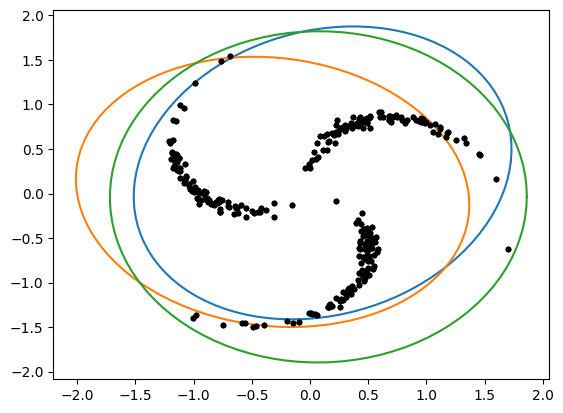

likelihood -773.9016803438842
aic,bic 1587.8033606877684 1661.8790101808925


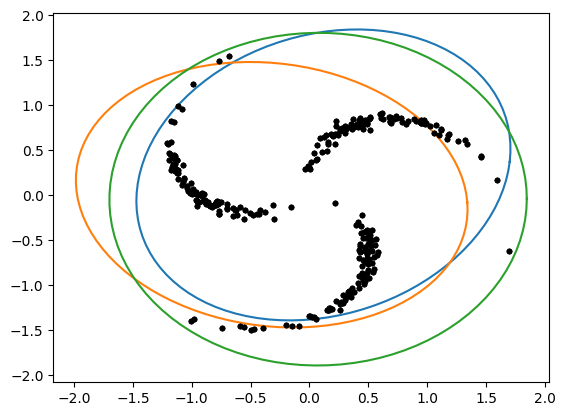

likelihood -768.6357794958024
aic,bic 1577.2715589916047 1651.3472084847288


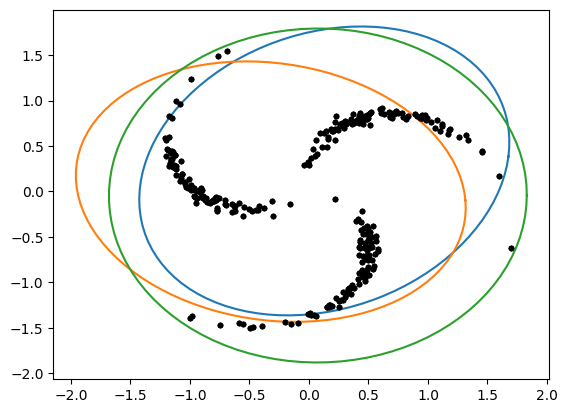

likelihood -763.2951335168302
aic,bic 1566.5902670336604 1640.6659165267845


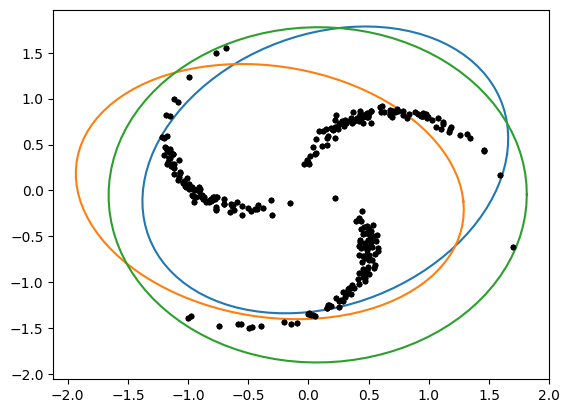

likelihood -757.8527155662937
aic,bic 1555.7054311325874 1629.7810806257114


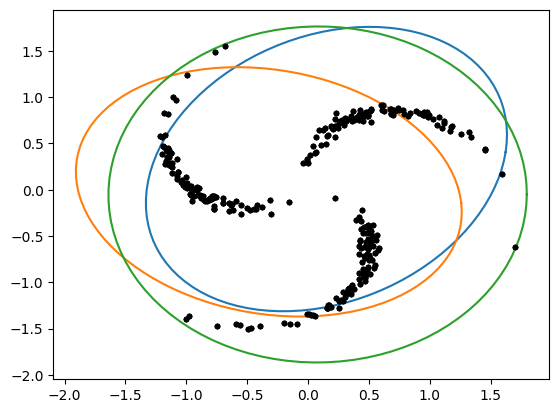

likelihood -752.2666775002469
aic,bic 1544.5333550004939 1618.609004493618


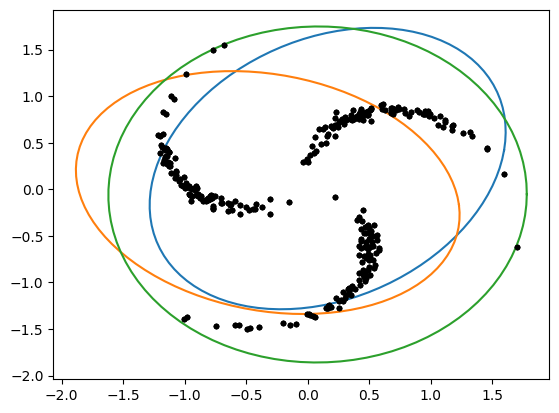

likelihood -746.4768742829128
aic,bic 1532.9537485658257 1607.0293980589497


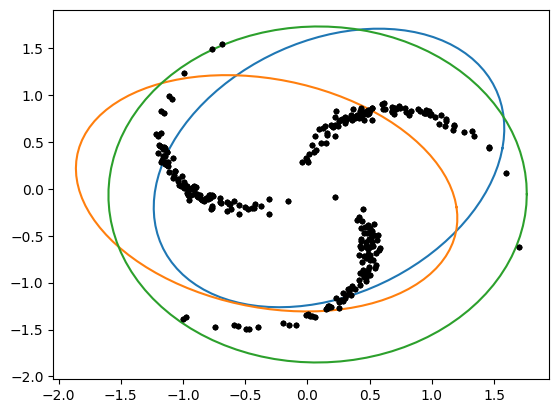

likelihood -740.4005902768201
aic,bic 1520.8011805536403 1594.8768300467643


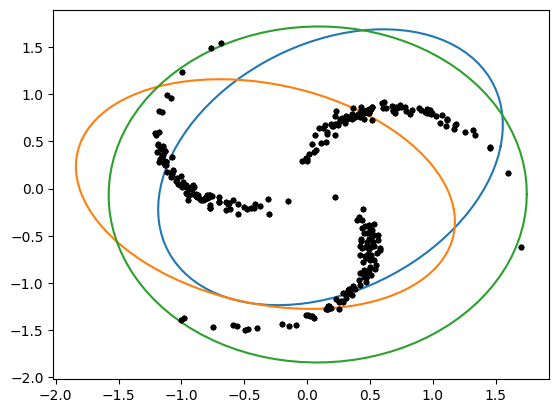

likelihood -733.9272977400908
aic,bic 1507.8545954801816 1581.9302449733057


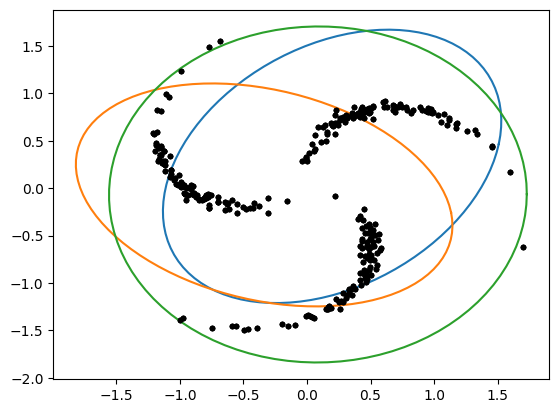

likelihood -726.9122411835132
aic,bic 1493.8244823670263 1567.9001318601504


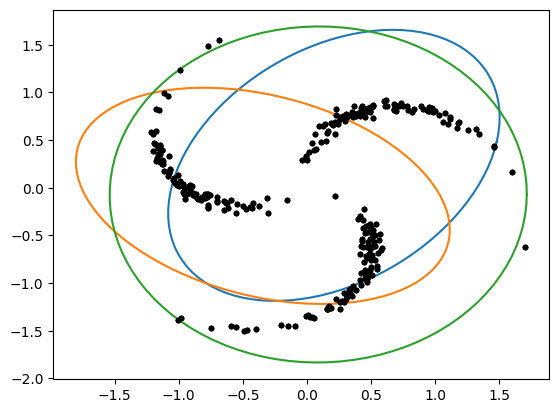

likelihood -719.168648223686
aic,bic 1478.337296447372 1552.412945940496


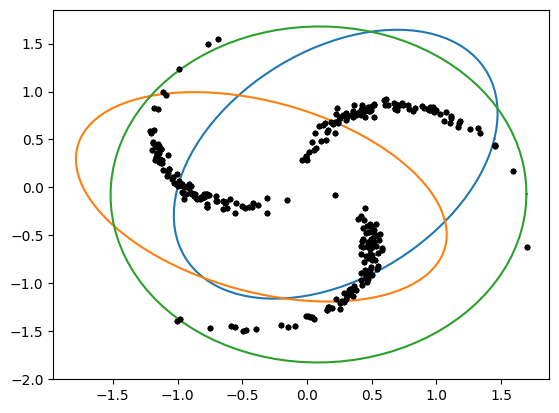

likelihood -710.4585842757072
aic,bic 1460.9171685514143 1534.9928180445384


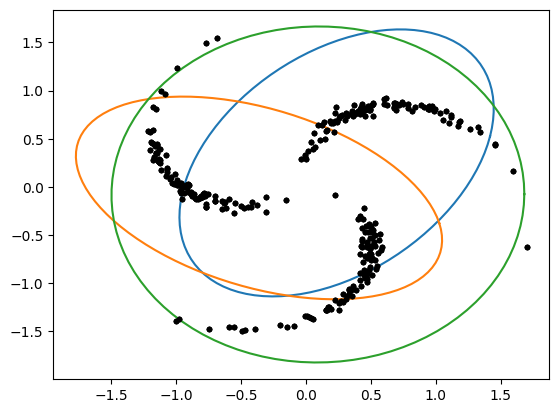

likelihood -700.4834603673421
aic,bic 1440.9669207346842 1515.0425702278083


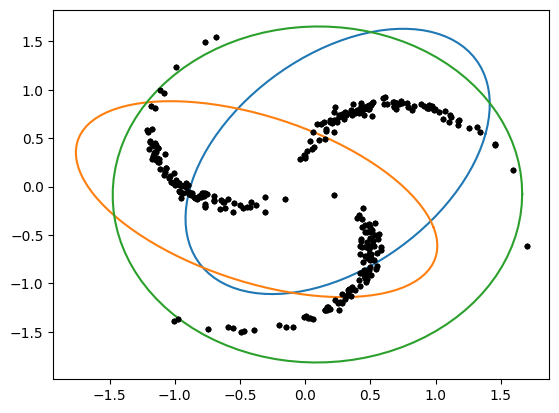

likelihood -688.8788626731457
aic,bic 1417.7577253462914 1491.8333748394155


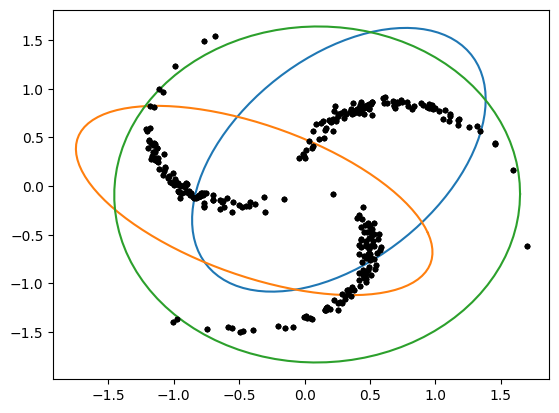

likelihood -675.2311219772478
aic,bic 1390.4622439544955 1464.5378934476196


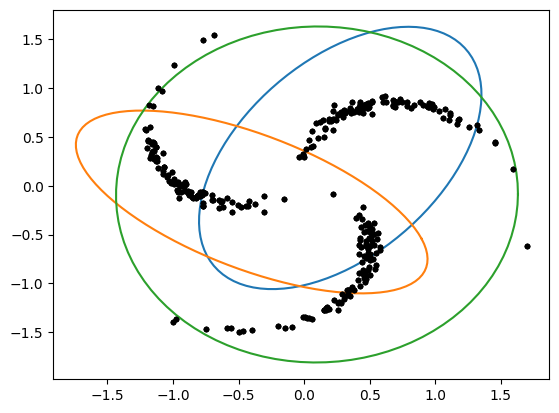

likelihood -659.1772239695256
aic,bic 1358.3544479390512 1432.4300974321752


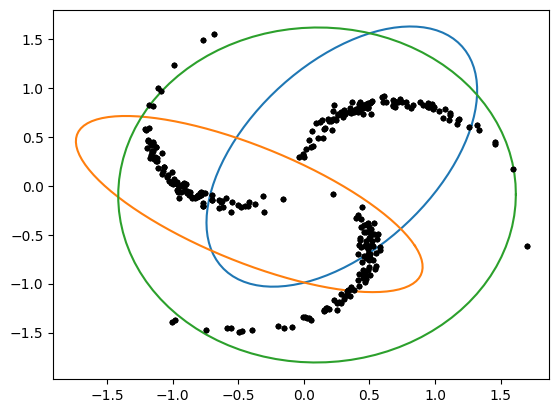

likelihood -640.8038968267409
aic,bic 1321.6077936534818 1395.683443146606


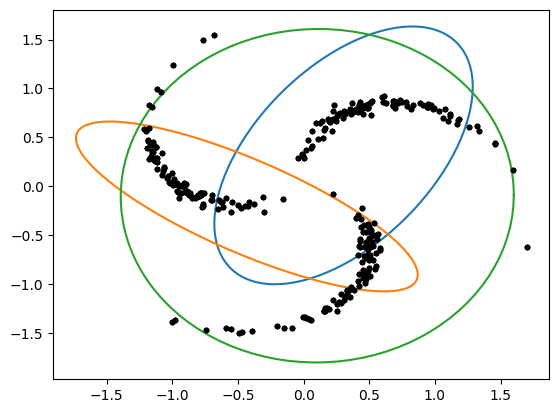

likelihood -622.0934590953555
aic,bic 1284.186918190711 1358.262567683835


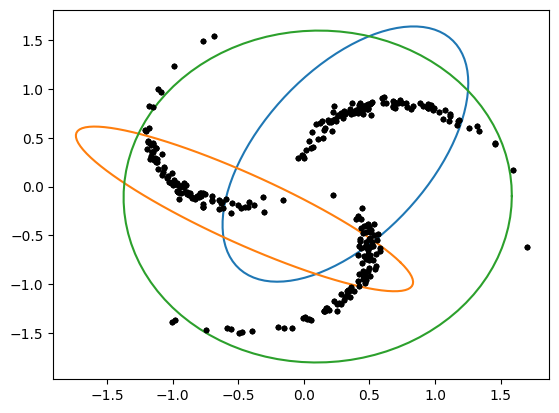

likelihood -611.868886593561
aic,bic 1263.737773187122 1337.813422680246


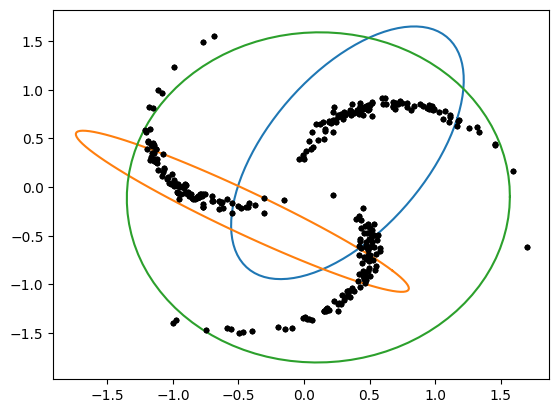

likelihood -634.2036571611038
aic,bic 1308.4073143222076 1382.4829638153317


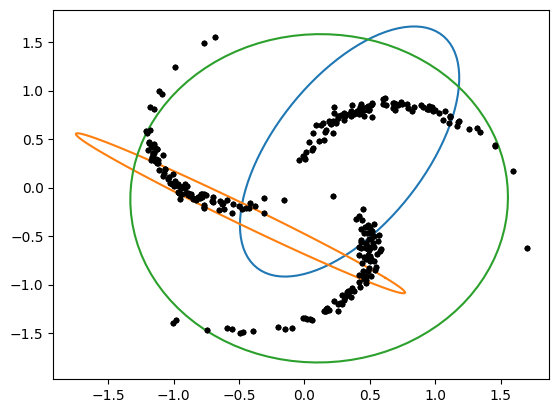

likelihood -624.3749497150895
aic,bic 1288.749899430179 1362.8255489233031


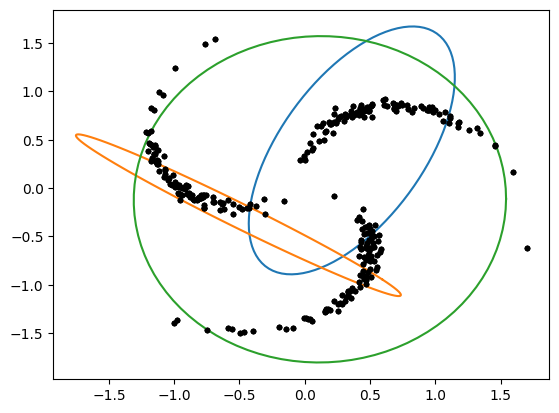

likelihood -605.4728348334093
aic,bic 1250.9456696668185 1325.0213191599425


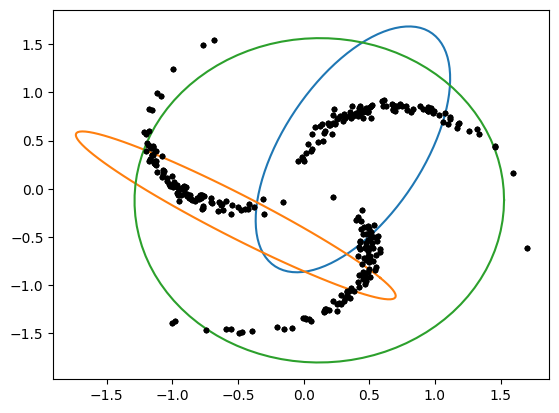

likelihood -601.704595769915
aic,bic 1243.40919153983 1317.4848410329541


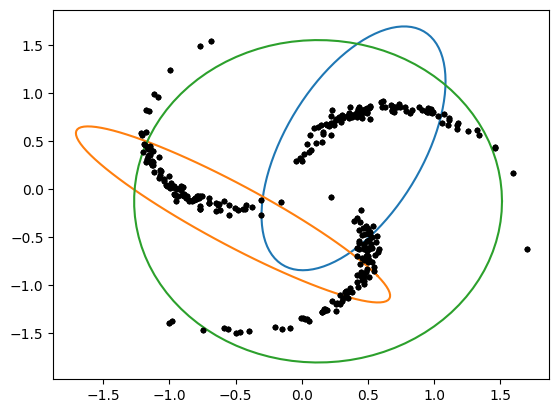

likelihood -603.2355442161339
aic,bic 1246.4710884322678 1320.5467379253919


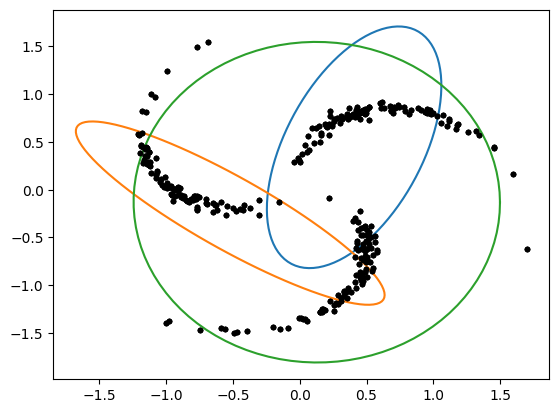

likelihood -604.2860658048219
aic,bic 1248.5721316096437 1322.6477811027678


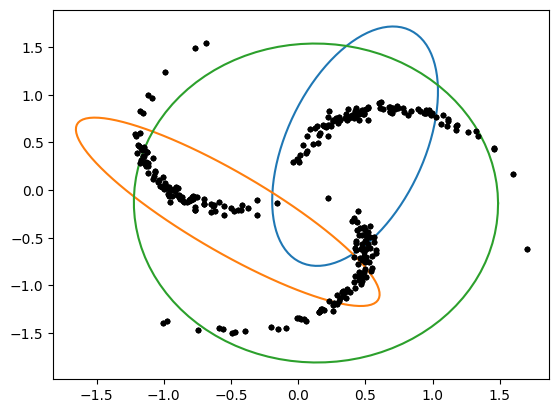

likelihood -603.0940970061199
aic,bic 1246.1881940122398 1320.2638435053639


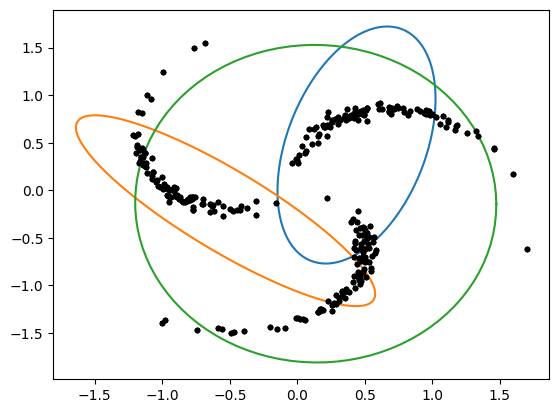

likelihood -599.4179692094982
aic,bic 1238.8359384189964 1312.9115879121205


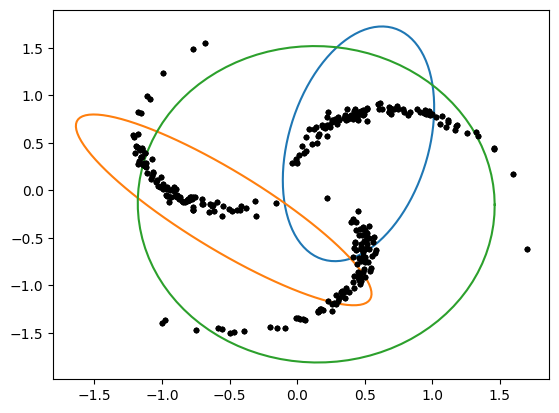

likelihood -593.5661885020311
aic,bic 1227.1323770040622 1301.2080264971862


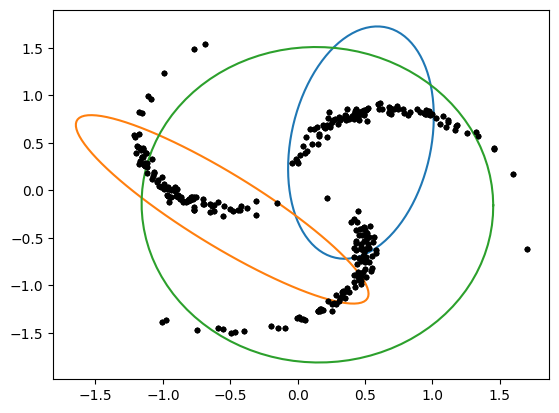

likelihood -586.2941012874021
aic,bic 1212.5882025748042 1286.6638520679282


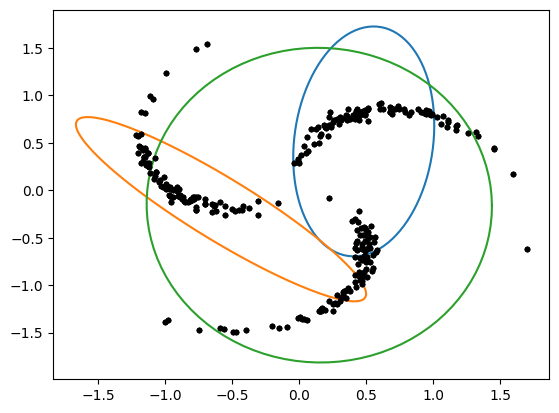

likelihood -579.548026679741
aic,bic 1199.096053359482 1273.1717028526061


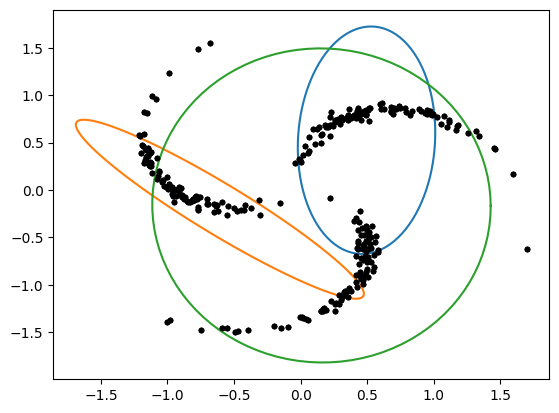

likelihood -578.109399955156
aic,bic 1196.218799910312 1270.2944494034361


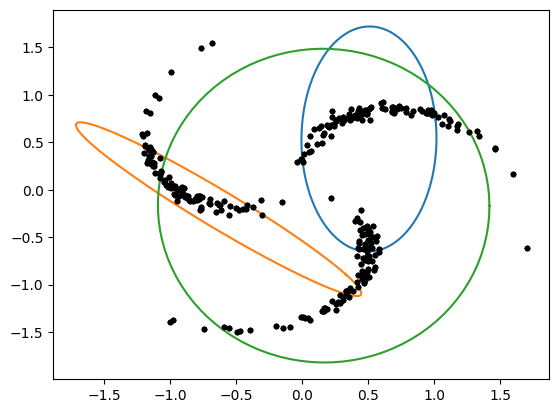

likelihood -585.5823765263044
aic,bic 1211.1647530526088 1285.2404025457329


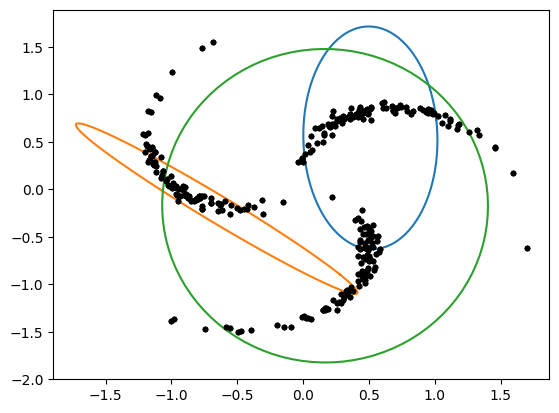

likelihood -580.6980050303669
aic,bic 1201.3960100607337 1275.4716595538578


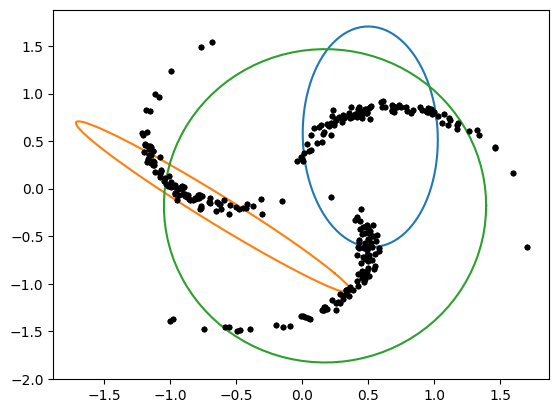

likelihood -570.788382193379
aic,bic 1181.576764386758 1255.652413879882


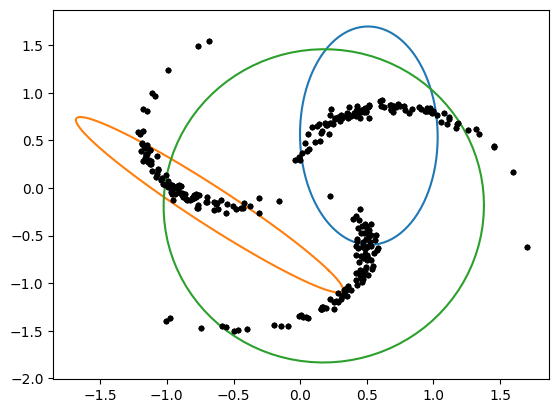

likelihood -568.8747345011586
aic,bic 1177.7494690023173 1251.8251184954413


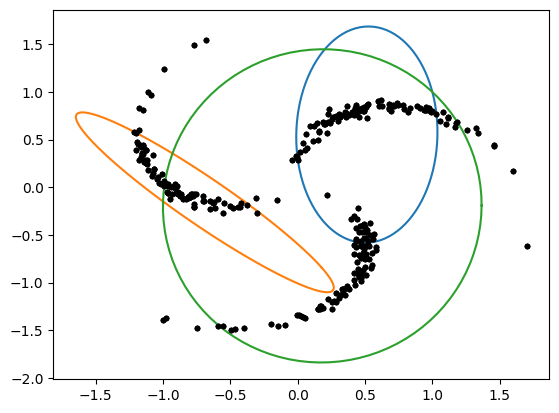

likelihood -568.7001542078025
aic,bic 1177.400308415605 1251.475957908729


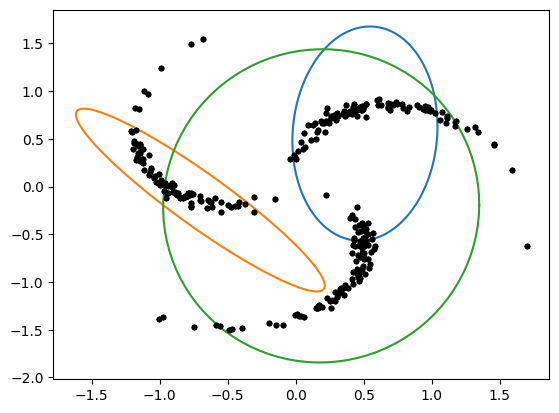

likelihood -566.6514548833213
aic,bic 1173.3029097666426 1247.3785592597667


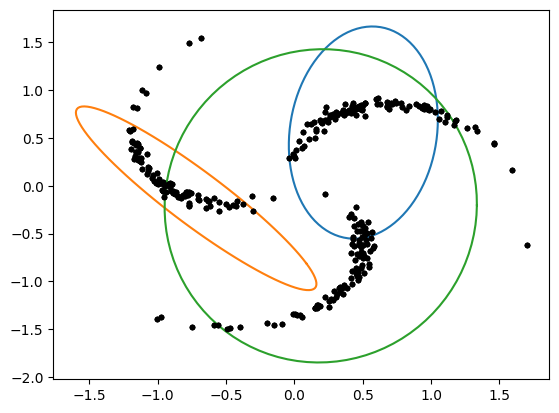

likelihood -562.0298818662195
aic,bic 1164.059763732439 1238.135413225563


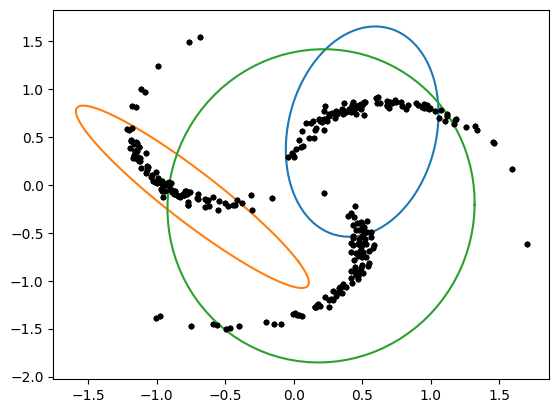

likelihood -555.9432311025797
aic,bic 1151.8864622051594 1225.9621116982835


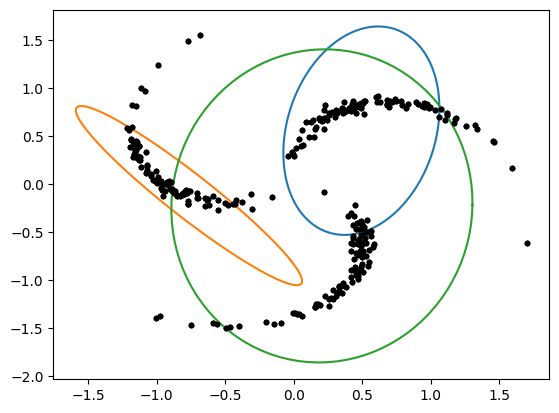

likelihood -551.8822322928357
aic,bic 1143.7644645856715 1217.8401140787955


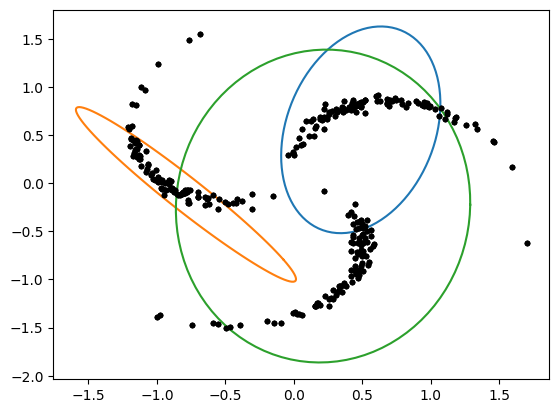

likelihood -553.7025861391621
aic,bic 1147.4051722783242 1221.4808217714483


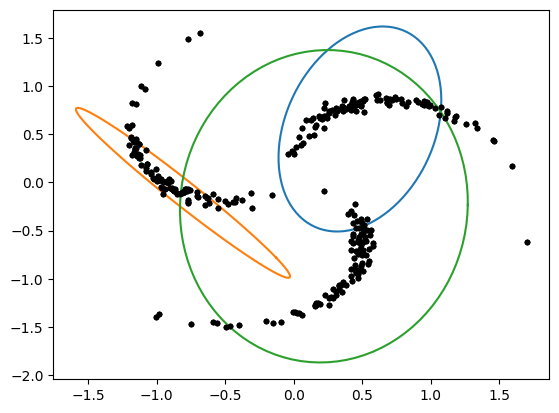

likelihood -548.2103613552581
aic,bic 1136.4207227105162 1210.4963722036402


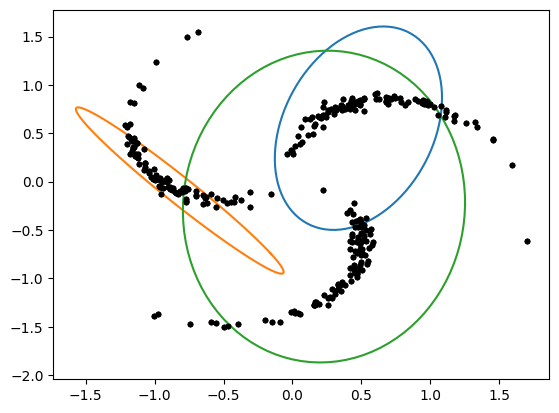

likelihood -542.1595482518183
aic,bic 1124.3190965036365 1198.3947459967605


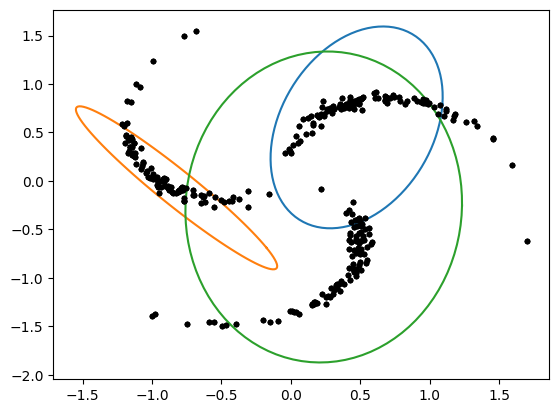

likelihood -540.1784544043595
aic,bic 1120.356908808719 1194.432558301843


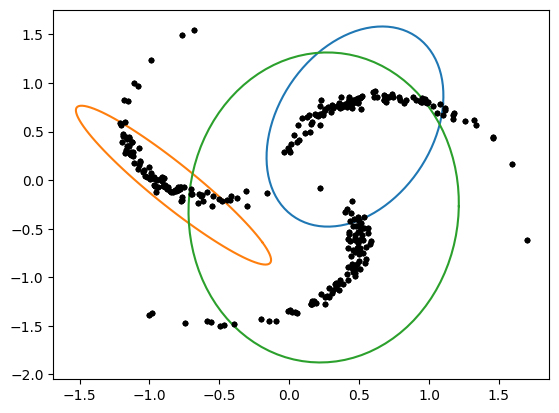

likelihood -537.2557201975405
aic,bic 1114.511440395081 1188.5870898882051


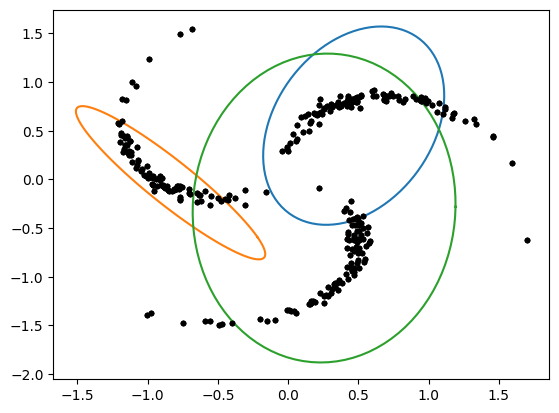

likelihood -531.7553393950337
aic,bic 1103.5106787900675 1177.5863282831915


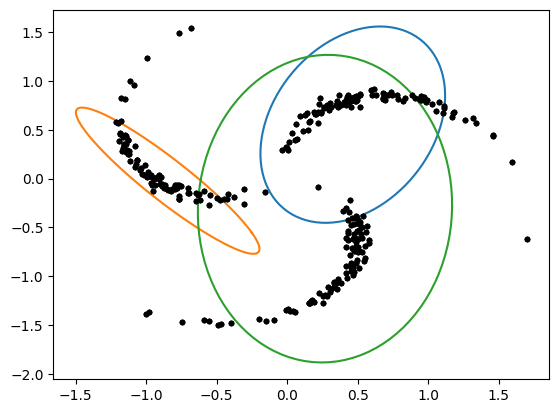

likelihood -524.6672046907695
aic,bic 1089.334409381539 1163.410058874663


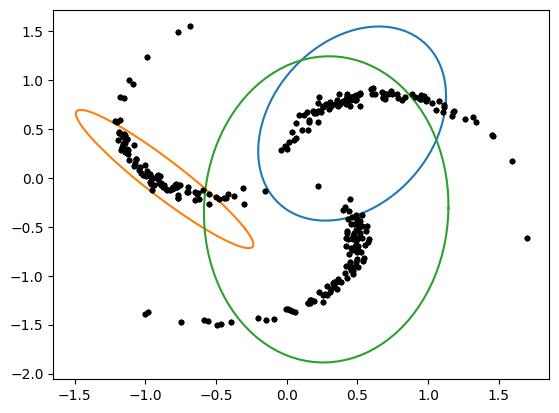

likelihood -519.1680105232331
aic,bic 1078.3360210464662 1152.4116705395902


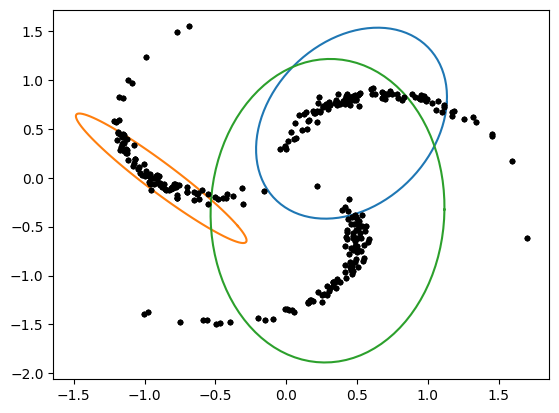

likelihood -514.6980562650751
aic,bic 1069.3961125301503 1143.4717620232743


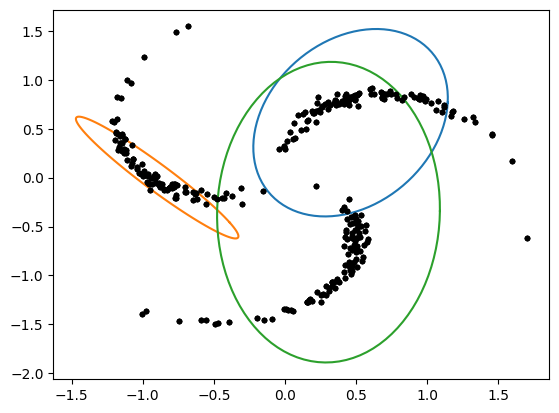

likelihood -505.88888467539243
aic,bic 1051.7777693507849 1125.853418843909


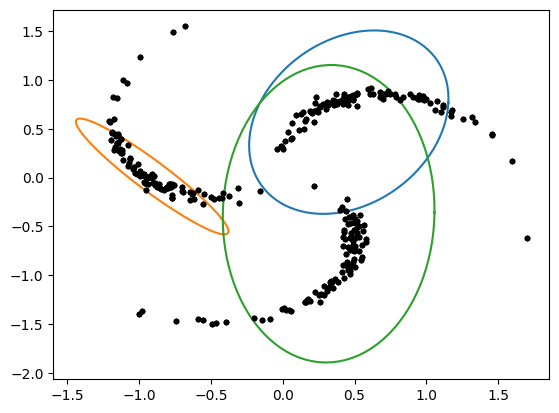

likelihood -497.22344172486527
aic,bic 1034.4468834497306 1108.5225329428545


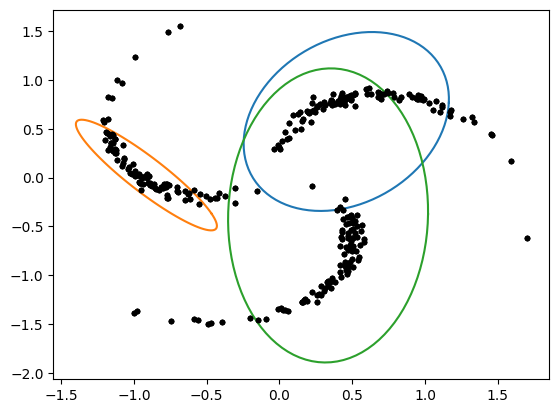

likelihood -488.67688361343
aic,bic 1017.35376722686 1091.429416719984


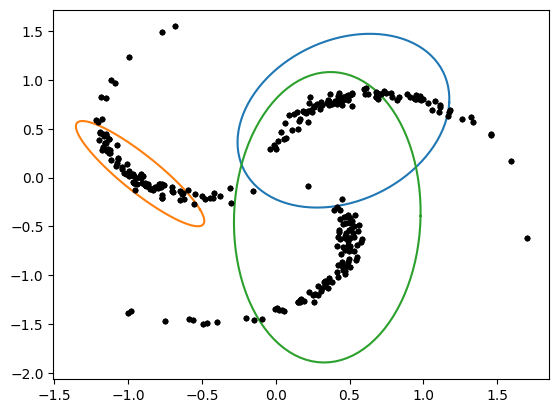

likelihood -478.6550891856089
aic,bic 997.3101783712178 1071.3858278643418


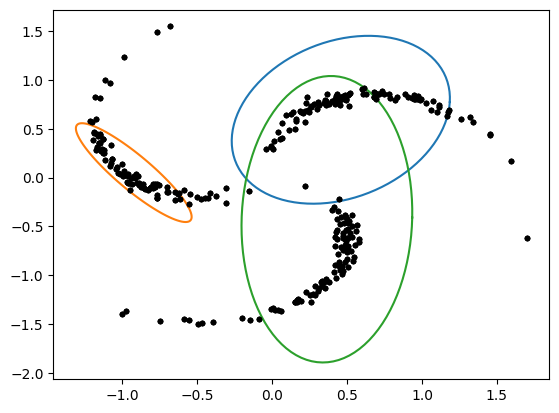

likelihood -466.16010414572537
aic,bic 972.3202082914507 1046.3958577845747


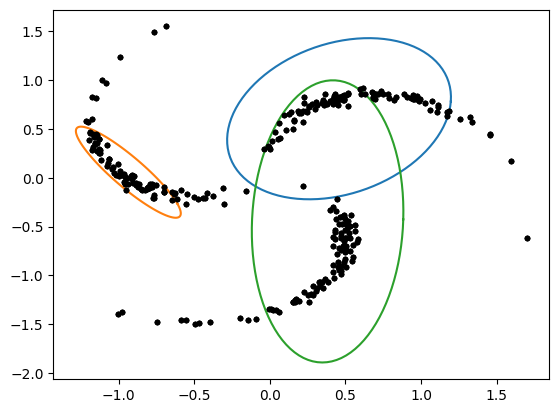

likelihood -452.0555196490409
aic,bic 944.1110392980818 1018.1866887912058


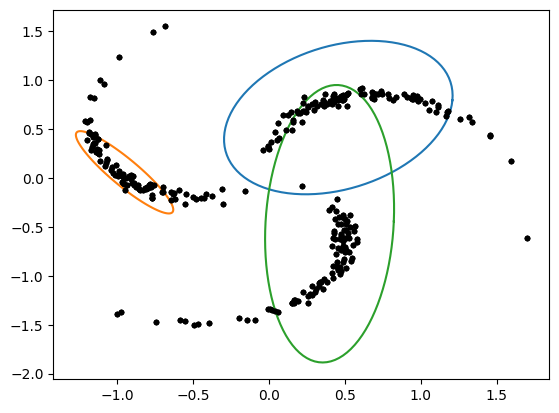

likelihood -437.58328585963363
aic,bic 915.1665717192673 989.2422212123913


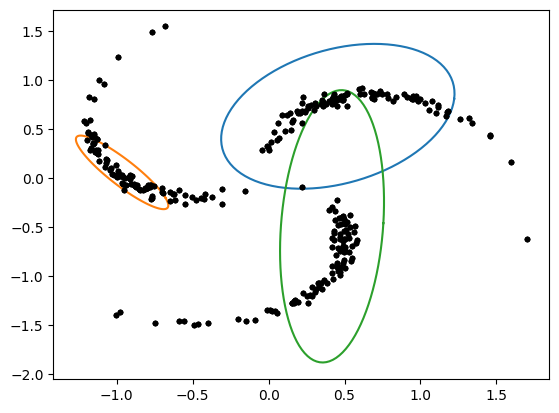

likelihood -421.20777194861233
aic,bic 882.4155438972247 956.4911933903487


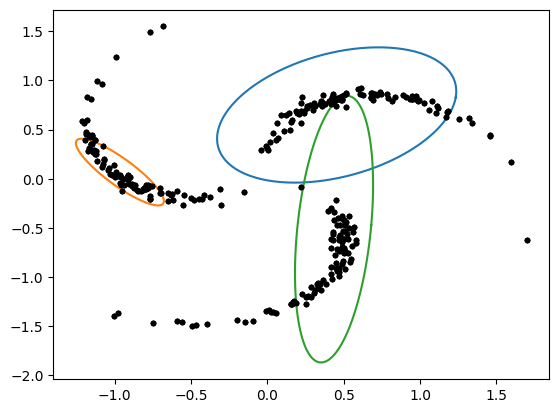

likelihood -409.9230811837034
aic,bic 859.8461623674068 933.9218118605309


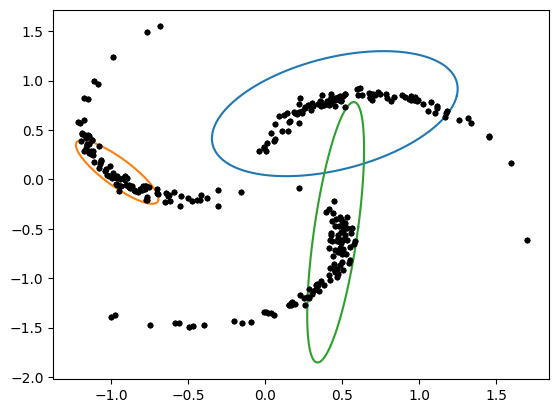

likelihood -422.5156130442457
aic,bic 885.0312260884914 959.1068755816154


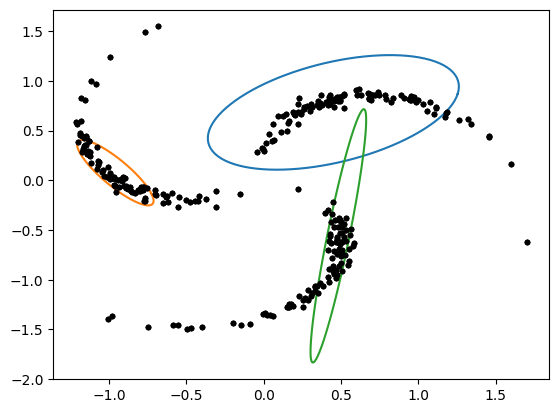

likelihood -389.42456717522373
aic,bic 818.8491343504475 892.9247838435715


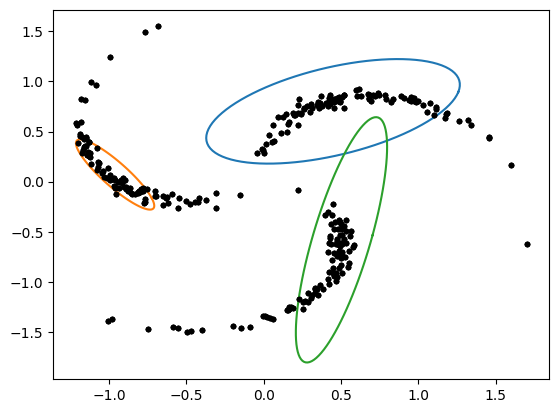

likelihood -380.71624511530416
aic,bic 801.4324902306083 875.5081397237324


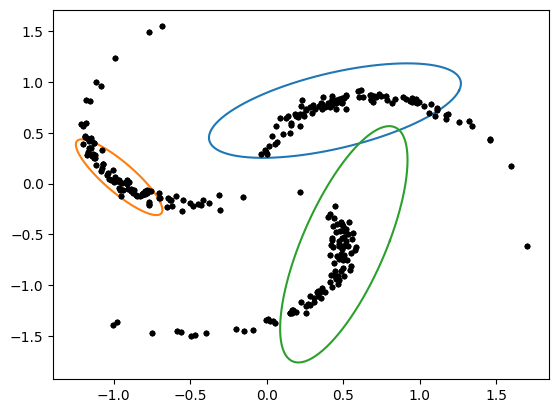

likelihood -371.5279410059758
aic,bic 783.0558820119516 857.1315315050756


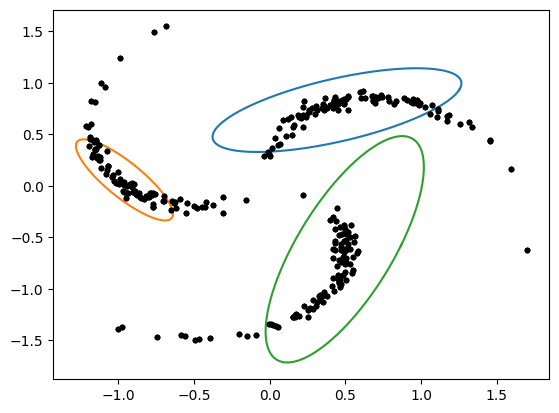

likelihood -360.5829851847062
aic,bic 761.1659703694124 835.2416198625365


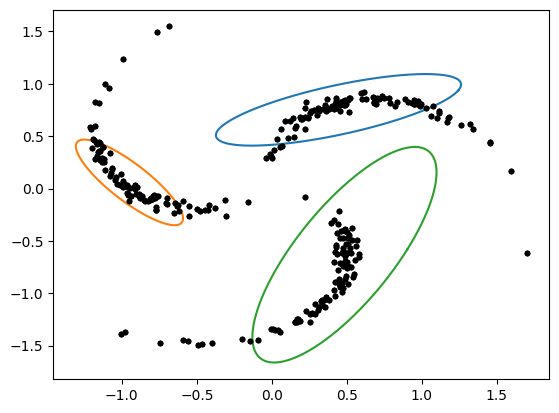

likelihood -355.5024725238171
aic,bic 751.0049450476342 825.0805945407583


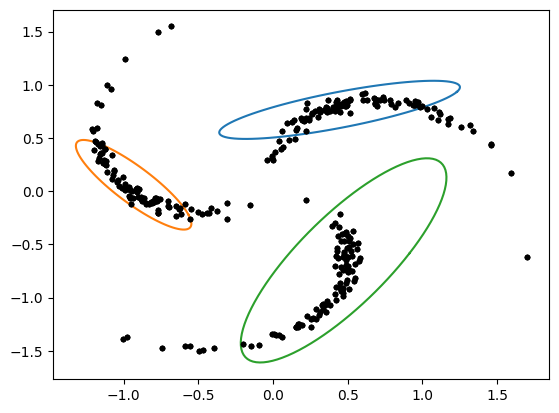

likelihood -362.1684575095379
aic,bic 764.3369150190758 838.4125645121999


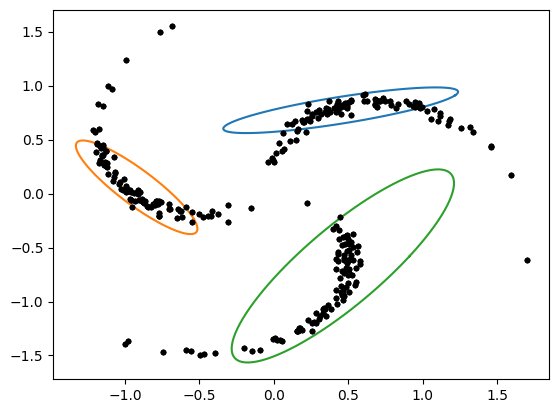

likelihood -357.6612363292446
aic,bic 755.3224726584892 829.3981221516133


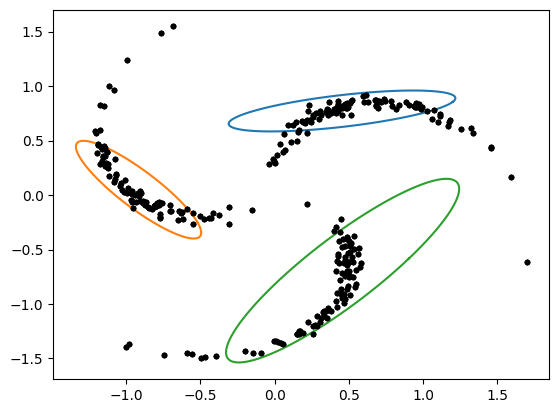

likelihood -353.9899694259441
aic,bic 747.9799388518882 822.0555883450122


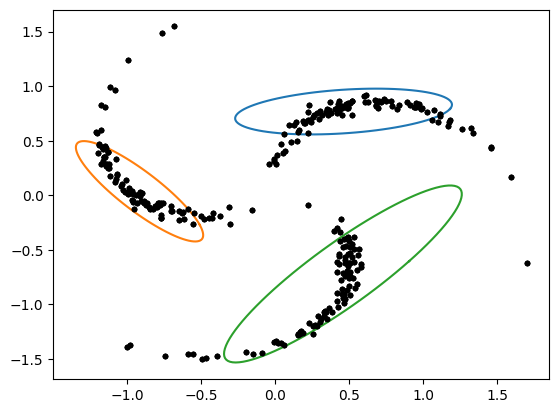

likelihood -352.3106224167463
aic,bic 744.6212448334926 818.6968943266166


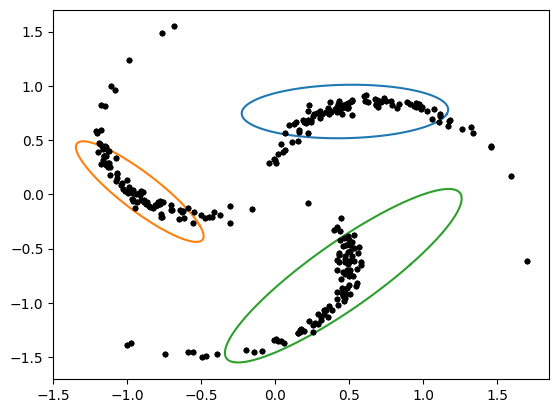

likelihood -350.90974431296655
aic,bic 741.8194886259331 815.8951381190572


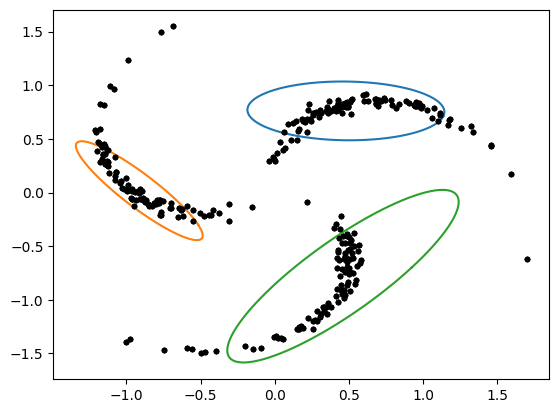

likelihood -349.2970555624818
aic,bic 738.5941111249635 812.6697606180876


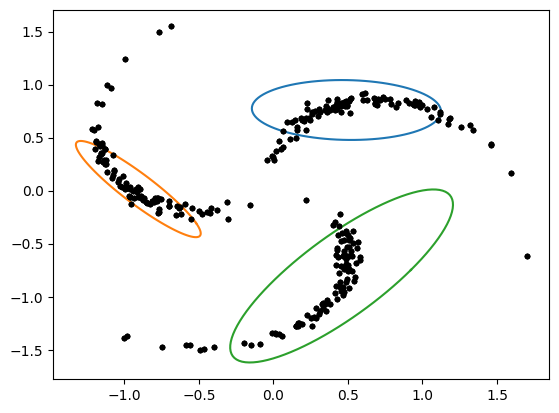

likelihood -343.47836811655424
aic,bic 726.9567362331085 801.0323857262325


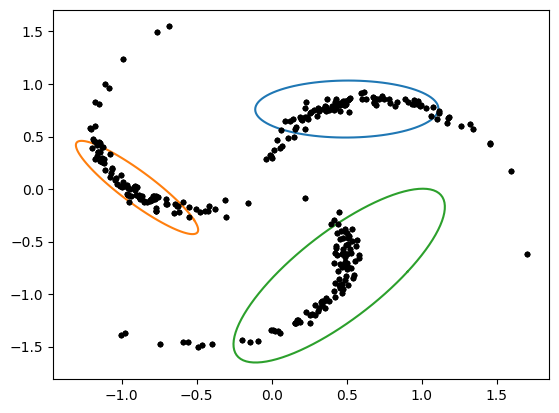

likelihood -334.32485994280603
aic,bic 708.6497198856121 782.7253693787361


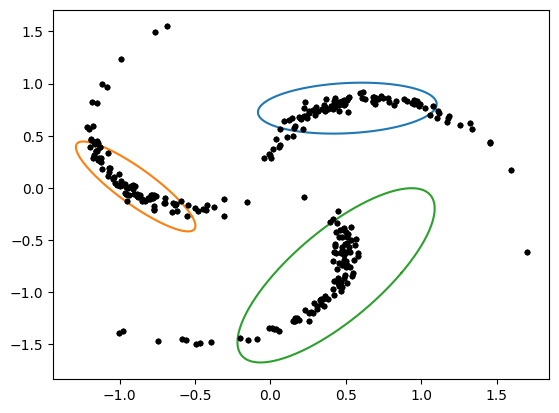

likelihood -324.9257040384118
aic,bic 689.8514080768236 763.9270575699477


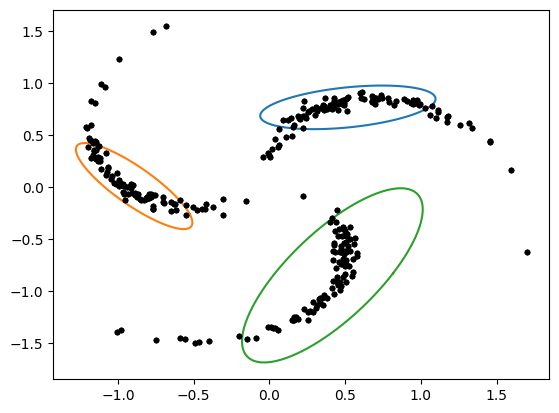

likelihood -322.2189912519642
aic,bic 684.4379825039284 758.5136319970525


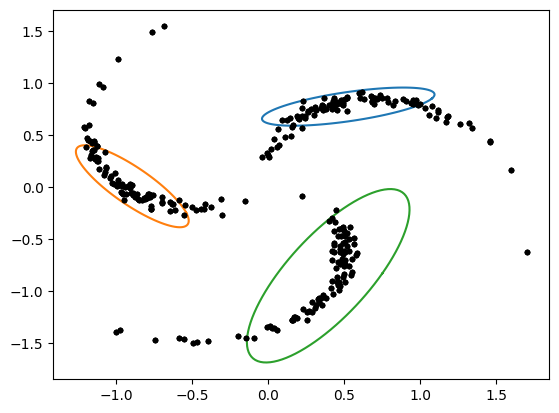

likelihood -322.9879447099478
aic,bic 685.9758894198956 760.0515389130196


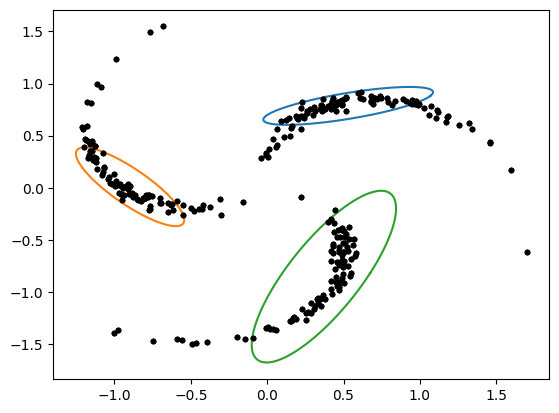

likelihood -318.1089416728165
aic,bic 676.217883345633 750.2935328387571


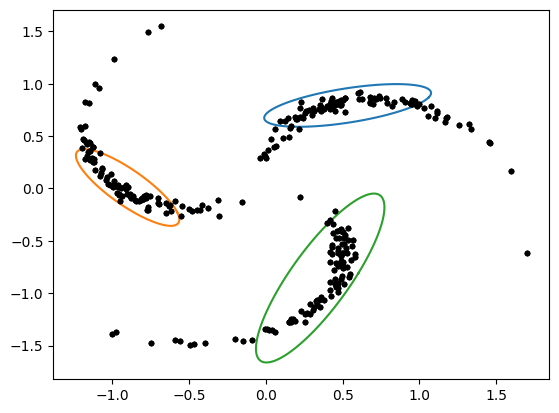

likelihood -319.7131366883318
aic,bic 679.4262733766636 753.5019228697877


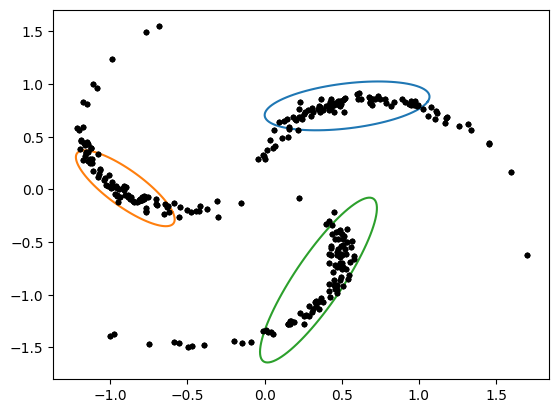

likelihood -316.4544644293847
aic,bic 672.9089288587694 746.9845783518934


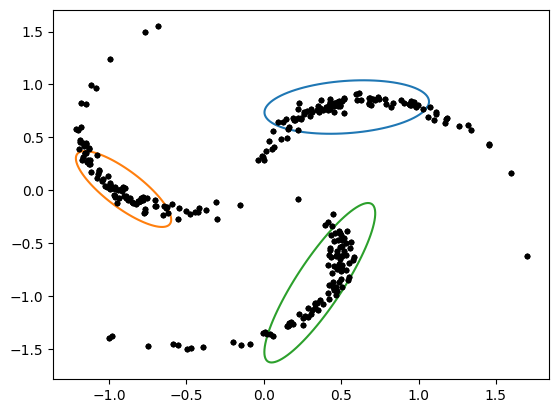

likelihood -313.2576446221514
aic,bic 666.5152892443028 740.5909387374269


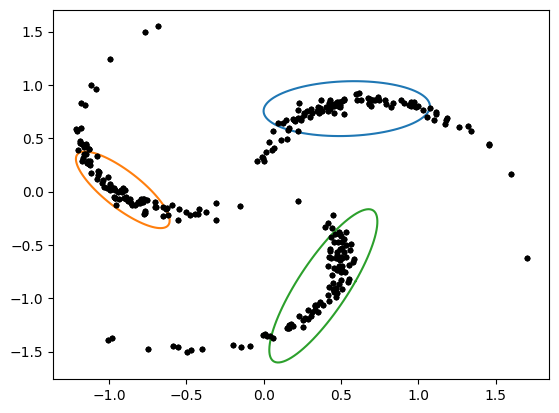

likelihood -314.00615175381773
aic,bic 668.0123035076355 742.0879530007595


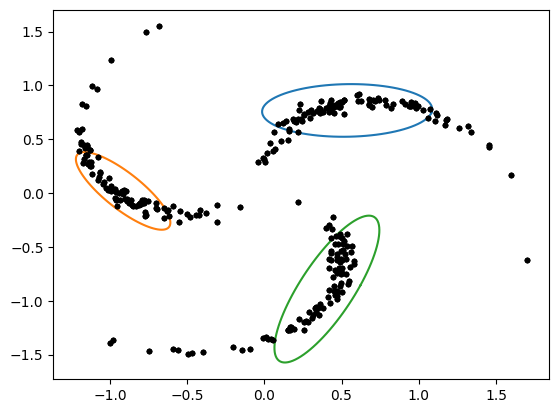

likelihood -312.3941131461137
aic,bic 664.7882262922274 738.8638757853514


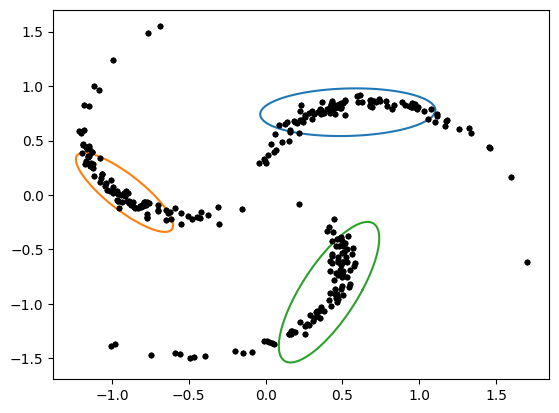

likelihood -308.32237098803114
aic,bic 656.6447419760623 730.7203914691863


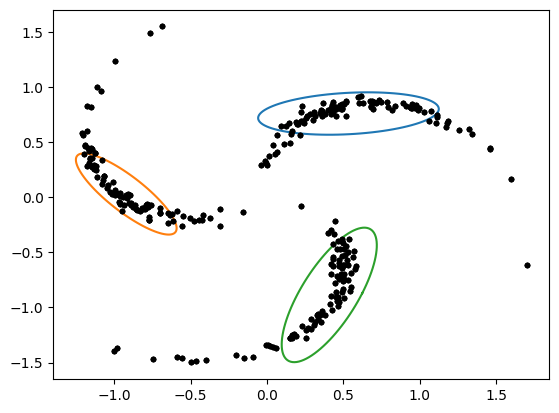

likelihood -305.39150095155367
aic,bic 650.7830019031073 724.8586513962314


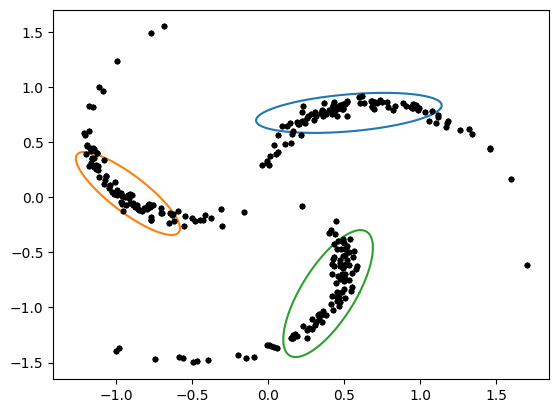

In [7]:
for params in params_store:
    print("likelihood",test_TMM.likelihood(params))
    print("aic,bic",test_TMM.aic(params),test_TMM.bic(params))
    

    draw_clusters(test_TMM.unpack_params(params),data)

In [8]:
### Final labels

np.array(test_TMM.labels(data,params_store[-1]))

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d